In [1]:
!pip install -q diffusers transformers accelerate safetensors


diffusers → contains Stable Diffusion pipeline

transformers → used for text encoder (CLIP)

accelerate → manages GPU efficiently

safetensors → faster & safer model loading

Without these, Stable Diffusion cannot run.

In [2]:
import torch    #PyTorch → deep learning framework , Handles:Tensors, GPU computation
from diffusers import StableDiffusionPipeline  #Imports pre-built pipeline , this contains: Text encoder (CLIP), U-Net (diffusion model), VAE (encoder + decoder)

model_id = "runwayml/stable-diffusion-v1-5" #model name hosted on Hugging Face  why? Lightweight, stable, works on free gpu

pipe = StableDiffusionPipeline.from_pretrained(  #Loading the Stable Diffusion pipeline, loads all above CLIP, U-NET,etc
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")  #Moving model to GPU, "cuda" = NVIDIA GPU - Moves all model weights to GPU & Enables fast image generation


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


#Stable Diffusion does not accept JSON prompts directly, but JSON can be used as a structured format that is converted into a natural language prompt before image generation.

**Because the model cannot read structured data — it reads natural language.**

Token indices sequence length is longer than the specified maximum sequence length for this model (388 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['through sheer curtains , warm highlights , gentle shadows , and a refined palette of soft gold , ivory , muted greens , and warm beige tones ; set in a modern , minimalistic bedroom vanity scene during early morning , with the elara botanics vitamin c serum bottle placed elegantly on a marble vanity surface in the foreground beside fresh orange slices , subtle dewdrops , and a folded linen cloth , while in the softly blurred background a confident young woman aged 2 5 – 3 5 with glowing skin looks into a mirror with a calm , self - assured smile , gently applying serum to her face ; conveying a mood of self - care , confidence , calm luxury , and natural beauty , focusing on authenticity rather than heavy

  0%|          | 0/30 [00:00<?, ?it/s]

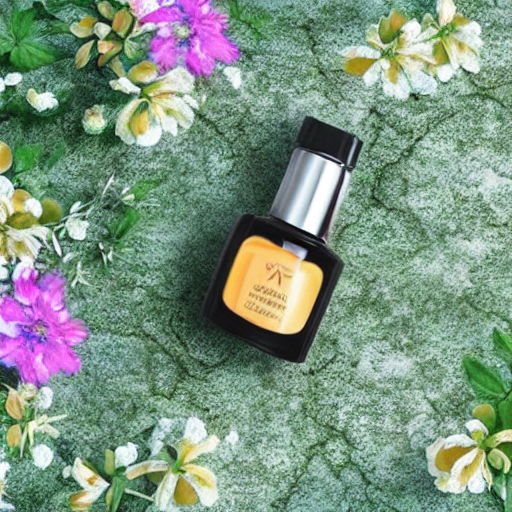

In [3]:
prompt = """
Generate a high-quality, photorealistic cinematic advertisement image suitable for Instagram and Facebook feed ads for the brand “Elara Botanics – Radiance Vitamin C Serum” with a campaign theme of “Glow Naturally, Glow Confidently” in a 1:1 aspect ratio, featuring a premium luxury skincare visual style with soft golden hour lighting, diffused natural sunlight streaming through sheer curtains, warm highlights, gentle shadows, and a refined palette of soft gold, ivory, muted greens, and warm beige tones; set in a modern, minimalistic bedroom vanity scene during early morning, with the Elara Botanics Vitamin C Serum bottle placed elegantly on a marble vanity surface in the foreground beside fresh orange slices, subtle dewdrops, and a folded linen cloth, while in the softly blurred background a confident young woman aged 25–35 with glowing skin looks into a mirror with a calm, self-assured smile, gently applying serum to her face; conveying a mood of self-care, confidence, calm luxury, and natural beauty, focusing on authenticity rather than heavy glamour; ensure shallow depth of field for a professional DSLR photography effect, sharp focus on the serum bottle with visible texture details on the glass packaging, natural reflections, and realistic skin tones; include minimal, clean, bold text with the headline placed at the top left reading “Glow that Speaks Before You Do”, the offer at the bottom right reading “Flat 20% OFF”, with “Limited Time Offer” written subtly below in smaller text, using a modern sans-serif font in white or soft gold; ensure the brand logo appears only on the product packaging, the product remains the clear hero element with premium lighting highlighting clarity and freshness, avoid excessive text or graphic clutter, keep the composition elegant and Meta ads safe with strong product visibility, natural emotion, and storytelling that reflects confidence through everyday self-care rituals.
"""

#above is the converted text prompt from jason format
image = pipe(
    prompt,
    guidance_scale=7.5,
    num_inference_steps=30
).images[0]

image


  0%|          | 0/30 [00:00<?, ?it/s]

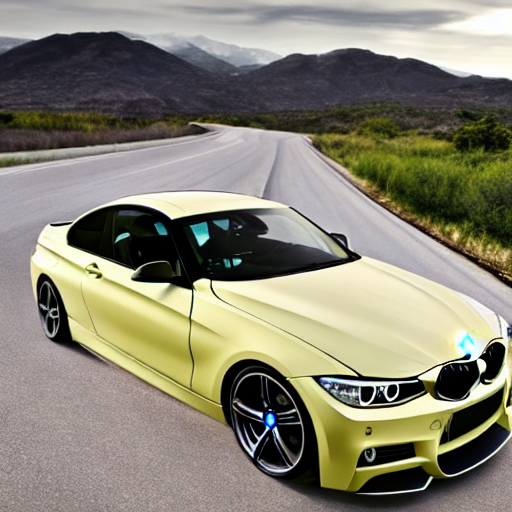

In [4]:
prompt="create a BMW car"
#above is the simple text prompt
image = pipe(
    prompt,
    guidance_scale=7.5,
    num_inference_steps=30
).images[0]

image

Image generation (MOST IMPORTANT PART)

This single line does everything.

Step-by-step internally:

Random noise is created in latent space

Prompt → CLIP → text embedding

U-Net removes noise step-by-step

Guidance scale controls prompt strength

Final latent → decoded to image

Image returned